In [4]:
import random
import math
import matplotlib.pyplot as plt

In [ ]:
def roll_die():
    """Returns a random int between 1 and 6"""
    return random.choice([1, 2, 3, 4, 5, 6])

def roll_n(n):
    result = ''
    for i in range(n):
        result = result + str(roll_die())
    print(result)

In [4]:
roll_n(10)

3523356516


In [5]:
roll_n(10)

4462353465


In [6]:
roll_n(10)

3335354226


1111111111 or 5442462412 each of these sequences is equally likely, because the value of each roll is independent of the values of the earlier rolls. In astochastic process, two evnt are independent if the outcome of one event has no influence on the outcome of the other. With a 2 sided die or a coin with values 0 and 1 has each number has a probability of occurring (1/2)^n. Going back to the 6 sided die, each of the sequences listed before - the number of different sequences of length 10 is 6^10 = 60466176 and the probability of rolling 10 consecutive 1s is 1/6^10 = 0.0000000165 - less than 1 out of 60 million.

Step 1 The probability of not rolling a 1 is 5/6,
Step 2 the probability of not rolling a 1 on the first or the second die is (5/6) * (5/6) or (5/6)^2,
Step 3 so the probability of not rolling a 1 10 times is 5/6^10 = 0.16.

Step 2 is an example of the **multiplicative law** for independent probabilities

We can use **inferential statistics** to estimate the probability of a single flip coming up heads, and then conventional probability to compute the probability of a coin with that behavior 10 times in a row. The guiding principle of inferential statistics is that random sample tends to exhibit the same properties as the population from which it is drawn.

In [7]:
def flip(num_flips):
    """Assumes num_flips is a positive integer."""
    heads = 0
    for i in range(num_flips):
        if random.choice(('H', 'T')) == 'H':
            heads += 1
    return heads/num_flips

def flip_sim(num_flips_per_trial, num_trials):
    """Assumes num_flips_per_trial and num_trials are positive integers."""
    frac_heads = []
    for i in range(num_trials):
        frac_heads.append(flip(num_flips_per_trial))
    mean = sum(frac_heads) / len(frac_heads)
    return mean

In [10]:
print('Mean = ', flip_sim(10, 1))
print('Mean = ', flip_sim(10, 1))

Mean =  0.2
Mean =  0.3


In [12]:
print('Mean = ', flip_sim(10, 100))
print('Mean = ', flip_sim(10, 100))

Mean =  0.541
Mean =  0.5270000000000001


In  the coin flip example we know the number should be 0.5 but what we are depending on is the **law of large numbers**, also known as **Bernoulli's theorem**. It is worth noting that the law of large numbers does not imply the that if deviations occur, the deviations are likely to be evened out by opposite deviations in the future. This misapplication of the law of large numbers is known as the **gambler's fallacy**. People often confuse gambler's fallacy with regression to the mean. **Regression to the mean** states that following an extreme random event, the next random event is likely to be less extreme. If you were to flip a fair coin six times and get six heads, regression to the mean implies that the next sequence of six flips is likely to have closer to the expected value of three heads. It does not imply, as the gambler's fallacy suggests, that the next sequence of flips is likely to have fewer heads than tails.

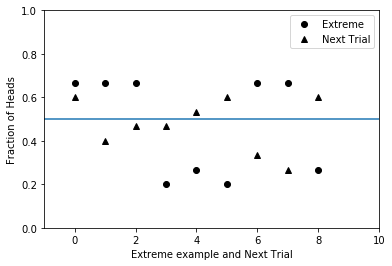

In [15]:
def regress_to_mean(num_flips, num_trails):
    #Get fraction of heads for each trial of num_flips
    frac_heads = []
    for t in range(num_trails):
        frac_heads.append(flip(num_flips))
    #find trails with extreme results and for each the next trial
    extremes, next_trials = [], []
    for i in range(len(frac_heads) - 1):
        if frac_heads[i] < 0.33 or frac_heads[i] > 0.66:
            extremes.append(frac_heads[i])
            next_trials.append(frac_heads[i+1])
    #plot results
    plt.plot(range(len(extremes)), extremes, 'ko', label = 'Extreme')
    plt.plot(range(len(next_trials)), next_trials, 'k^', label = 'Next Trial')
    plt.axhline(0.5)
    plt.ylim(0, 1)
    plt.xlim(-1, len(extremes) + 1)
    plt.xlabel('Extreme example and Next Trial')
    plt.ylabel('Fraction of Heads')
    plt.legend(loc = 'best')

regress_to_mean(15, 50)


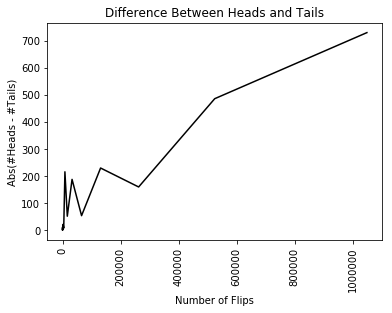

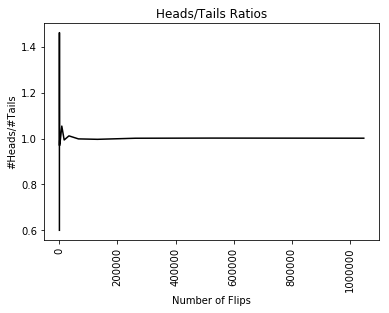

In [28]:
def flip_plot(min_exp, max_exp):
    """Assume min_exp and max_exp are positive integers; min_exp < max_exp. Plots results of 2**min_exp to 2**max_exp coin flips."""
    ratios, diffs, xAxis = [], [], []
    for exp in range(min_exp, max_exp + 1):
        xAxis.append(2**exp)
    for num_flips in xAxis:
        num_heads = 0
        for n in range(num_flips):
            if random.choice(('H', 'T')) == 'H':
                num_heads += 1
        num_tails = num_flips - num_heads
        try:
            ratios.append(num_heads / num_tails)
            diffs.append(abs(num_heads - num_tails))
        except ZeroDivisionError:
            continue
    plt.title('Difference Between Heads and Tails')
    plt.xlabel('Number of Flips')
    plt.ylabel('Abs(#Heads - #Tails)')
    plt.xticks(rotation='vertical')
    plt.plot(xAxis, diffs, 'k')
    plt.figure()
    plt.title('Heads/Tails Ratios')
    plt.xlabel('Number of Flips')
    plt.ylabel('#Heads/#Tails')
    plt.xticks(rotation='vertical')
    plt.plot(xAxis, ratios, 'k')

random.seed(0)
flip_plot(4, 20)

In [29]:
def run_coin_trials(min_exp, max_exp, num_trials=50):
    """
    For each N = 2**exp in [min_exp, max_exp], run `num_trials` experiments
    of N coin flips. Return:
      ns              : list of N values
      mean_diff       : mean of |H - T| for each N
      se_diff         : standard error of |H - T|
      mean_ratio      : mean of H/T (ignoring trials where T=0)
      se_ratio        : standard error of H/T
      theo_diff       : theoretical E|H-T| ~ sqrt(2N/pi)
    """
    ns = [2 ** e for e in range(min_exp, max_exp + 1)]
    mean_diff, se_diff = [], []
    mean_ratio, se_ratio = [], []
    theo_diff = []

    for N in ns:
        diffs = []
        ratios = []

        for _ in range(num_trials):
            heads = 0
            for _ in range(N):
                if random.choice(('H', 'T')) == 'H':
                    heads += 1
            tails = N - heads

            # |H - T|
            diff = abs(heads - tails)
            diffs.append(diff)

            # H / T (skip if tails == 0 to avoid division by zero)
            if tails > 0:
                ratios.append(float(heads) / tails)

        # Mean and standard error for diffs
        m_diff = sum(diffs) / float(len(diffs))
        if len(diffs) > 1:
            var_diff = sum((x - m_diff) ** 2 for x in diffs) / float(len(diffs) - 1)
            se_d = math.sqrt(var_diff) / math.sqrt(len(diffs))
        else:
            se_d = 0.0

        mean_diff.append(m_diff)
        se_diff.append(se_d)

        # Mean and standard error for ratios
        if len(ratios) > 0:
            m_ratio = sum(ratios) / float(len(ratios))
            if len(ratios) > 1:
                var_ratio = sum((x - m_ratio) ** 2 for x in ratios) / float(len(ratios) - 1)
                se_r = math.sqrt(var_ratio) / math.sqrt(len(ratios))
            else:
                se_r = 0.0
        else:
            m_ratio = float('nan')
            se_r = 0.0

        mean_ratio.append(m_ratio)
        se_ratio.append(se_r)

        # Theoretical growth: E|H-T| ≈ sqrt(2N/pi)
        theo_diff.append(math.sqrt(2.0 * N / math.pi))

    return ns, mean_diff, se_diff, mean_ratio, se_ratio, theo_diff

def plot_law_of_large_numbers(min_exp, max_exp, num_trials=50):
    random.seed(0)  # for reproducibility

    ns, mean_diff, se_diff, mean_ratio, se_ratio, theo_diff = \
        run_coin_trials(min_exp, max_exp, num_trials)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

    # ----- Top: Difference plot (log–log) -----
    ax1.set_title('Difference Between Heads and Tails')
    ax1.set_xlabel('Number of Flips')
    ax1.set_ylabel('Abs(#Heads - #Tails)')
    ax1.set_xscale('log')
    ax1.set_yscale('log')

    # Error bars for simulated mean |H-T|
    ax1.errorbar(ns, mean_diff, yerr=se_diff, fmt='o', capsize=3,
                 label='Simulated mean |H - T|')

    # Theoretical √(2N/π) curve
    ax1.loglog(ns, theo_diff, '-', label='Theoretical ~ sqrt(2N/π)')

    ax1.legend(loc='upper left')

    # ----- Bottom: Ratio plot (semilog-x) -----
    ax2.set_title('Heads/Tails Ratios')
    ax2.set_xlabel('Number of Flips')
    ax2.set_ylabel('#Heads / #Tails')
    ax2.set_xscale('log')

    ax2.errorbar(ns, mean_ratio, yerr=se_ratio, fmt='o', capsize=3,
                 label='Simulated mean H/T')
    ax2.axhline(1.0, linestyle='--', linewidth=1, label='Ratio = 1')

    ax2.legend(loc='best')

    plt.tight_layout()
    plt.show()



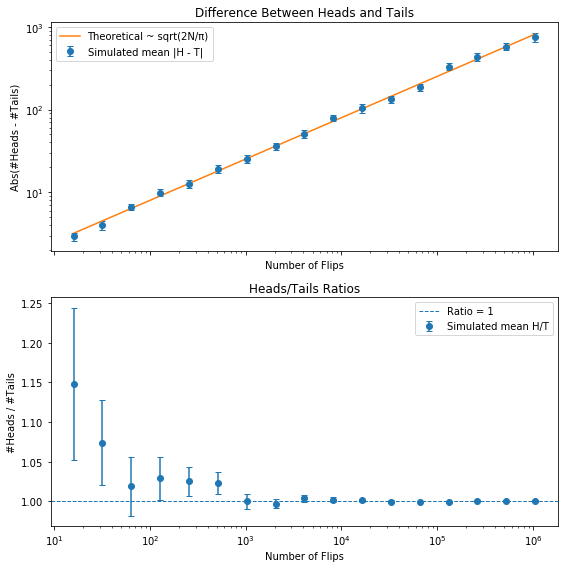

In [30]:
plot_law_of_large_numbers(4, 20, num_trials=50)

**Variance** in n the distribution - this is a measure of how much spread there is in the possible different outcomes
 $$
\text{variance}(X) = \frac{\sum_{x \in X} (x - \mu)^2}{|X|}
$$
 where $|X|$ is the size of the collection and $\mu$ (mu) its mean.
 The **standard deviation** of a collection of values is the square root of the variance
 The **coefficient of variation** is the standard deviation divided by the mean. When comparing datasets with different means (as here) the coefficient of variation is often more informative than the standard deviation. In general, distributions with a coefficient of variation of less than 1 are considered low-variance.

In [55]:
def variance(X):
    """Assumes that X is a list of numbers. Returns the variance of X"""
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return tot/len(X)

def std_dev(X):
    """Assumes that X is a list of numbers. Returns the standard deviation of X"""
    return variance(X)**0.5

def CV(X):
    mean = sum(X)/len(X)
    try:
        return std_dev(X)/mean
    except ZeroDivisionError:
        return float('nan')

def make_plot(x_vals, y_vals, title, x_label, y_label, style, log_x = False, log_y = False):
    plt.figure()
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if log_x and log_y:
        plt.loglog(x_vals, y_vals, style)
    elif log_x:
        plt.semilogx(x_vals, y_vals, style)
    elif log_y:
        plt.semilogy(x_vals, y_vals, style)
    else:
        plt.plot(x_vals, y_vals, style)

def run_trial(num_flips):
    num_heads = 0
    for n in range(num_flips):
        if random.choice(('H', 'T')) == 'H':
            num_heads += 1
    num_tails = num_flips - num_heads
    return (num_heads, num_tails)

def flip_plot1(min_exp, max_exp, num_trails):
    """"Assumes min_exp, max_exp, num_trails ints >0; min_exp < max_exp Plots summaries of results of num_trials trials of 2**min_exp to 2**max_exp coin flips"""
    ratios_means, diffs_means, ratios_SDs, diffs_SDs = [], [], [], []
    x_axis = [2**exp for exp in range(min_exp, max_exp + 1)]

    for num_flips in x_axis:
        ratios, diffs = [], []
        for t in range(num_trails):
            num_heads, num_tails = run_trial(num_flips)
            if num_trails > 0:
                ratios.append(float(num_heads) / num_tails)
            diffs.append(abs(num_tails - num_heads))

        ratios_means.append(sum(ratios)/len(ratios))
        diffs_means.append(sum(diffs) / len(diffs))

        ratios_SDs.append(std_dev(ratios))
        diffs_SDs.append(std_dev(diffs))

    title = "Mean Heads/Tails Ratios {} Trails".format(num_trails)
    make_plot(x_axis, ratios_means, title, 'Number of Flips', 'Mean Heads/Tails Ratios', 'ko', log_x = True)

    title = "SD Heads/Tails Ratios {} Trails".format(num_trails)
    make_plot(x_axis, ratios_SDs, title, 'Number of Flips', 'Standard Deviation', 'ko', log_x = True, log_y = True)

def flip_plot2(min_exp, max_exp, num_trails):
    """"Assumes min_exp, max_exp, num_trails ints >0; min_exp < max_exp Plots summaries of results of num_trials trials of 2**min_exp to 2**max_exp coin flips"""
    ratios_means, diffs_means, ratios_SDs, diffs_SDs = [], [], [], []
    ratios_CVs, diffs_CVs = [], []
    x_axis = [2**exp for exp in range(min_exp, max_exp + 1)]

    for num_flips in x_axis:
        ratios, diffs = [], []
        for t in range(num_trails):
            num_heads, num_tails = run_trial(num_flips)
            if num_trails > 0:
                ratios.append(float(num_heads) / num_tails)
            diffs.append(abs(num_tails - num_heads))

        ratios_means.append(sum(ratios)/len(ratios))
        diffs_means.append(sum(diffs) / len(diffs))

        ratios_SDs.append(std_dev(ratios))
        diffs_SDs.append(std_dev(diffs))

        ratios_CVs.append(CV(ratios))
        diffs_CVs.append(CV(diffs))

    title = "Mean Heads/Tails Ratios {} Trails".format(num_trails)
    make_plot(x_axis, ratios_means, title, 'Number of Flips', 'Mean Heads/Tails Ratios', 'ko', log_x = True)

    title = "SD Heads/Tails Ratios {} Trails".format(num_trails)
    make_plot(x_axis, ratios_SDs, title, 'Number of Flips', 'Standard Deviation', 'ko', log_x = True, log_y = True)

    title = "Mean abs(#Head - #Tails) {} Trails)".format(num_trails)
    make_plot(x_axis, diffs_means, title, 'Number of Flips', 'Mean abs(#Head - #Tails)', 'ko', log_x = True, log_y = True)

    title = 'SD abs(#Heads - #Tails) {} Trails'.format(num_trails)
    make_plot(x_axis, diffs_SDs, title, 'Number of Flips', 'Standard Deviation', 'ko', log_x = True, log_y = True)

    title = 'Coeff. of Var. abs(#Heads - #Tails) {} Trails'.format(num_trails)
    make_plot(x_axis, diffs_CVs, title, 'Number of Flips', 'Coeff. of Var.', 'ko', log_x = True, log_y = True)

    title = 'Coeff. of Var. Heads/Tails Ratio {} Trails'.format(num_trails)
    make_plot(x_axis, ratios_CVs, title, 'Number of Flips', 'Coeff. of Var.', 'ko', log_x = True, log_y = True)

def flip_sim(num_flips_per_trial, num_trials):
    """Run num_trials of num_flips_per_trial coin flips. Returns (list of fractions of heads per trial, mean, sd"""
    frac_heads = []
    for t in range(num_trials):
        heads = 0
        for n in range(num_flips_per_trial):
            if random.choice(('H', 'T')) == 'H':
                heads += 1
        frac_heads.append(heads / float(num_flips_per_trial))

    mean = sum(frac_heads) / len(frac_heads)
    sd = std_dev(frac_heads)
    return frac_heads, mean, sd

def label_plot(num_flips, num_trials, mean, sd):
    plt.title(str(num_trials) + ' trials of ' + str(num_flips) + ' Flips each')
    plt.xlabel('Fraction of Heads')
    plt.ylabel('Number of Trials')
    plt.annotate('Mean = ' + str(round(mean, 4)) + '\nSD = ' + str(round(sd, 4)), size='x-large', xycoords='axes fraction', xy = (0.67, 0.5))

def make_plots(num_flips1, num_flips2, num_trails):
    val1, mean1, sd1 = flip_sim(num_flips1, num_trails)
    plt.hist(val1, bins =20)
    x_min, x_max = plt.xlim()
    label_plot(num_flips1, num_trails, mean1, sd1)
    plt.figure()
    val2, mean2, sd2 = flip_sim(num_flips2, num_trails)
    plt.hist(val2, bins =20, ec = 'k')
    plt.xlim(x_min, x_max)
    label_plot(num_flips2, num_trails, mean2, sd2)

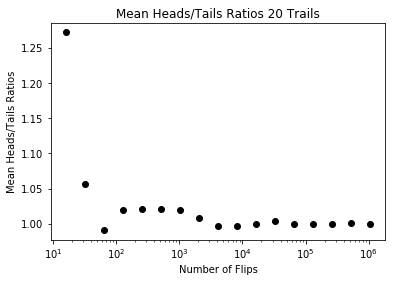

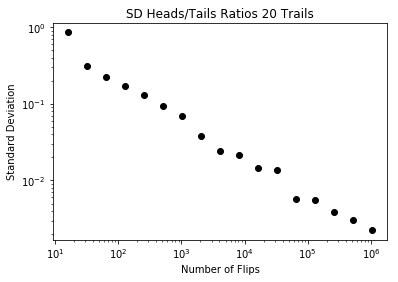

In [56]:
random.seed(0)
flip_plot1(4, 20, 20)
plt.show()

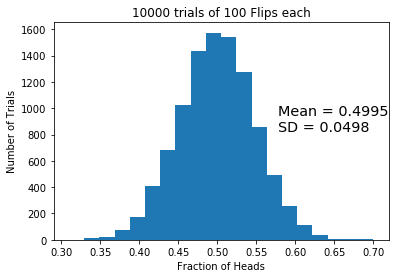

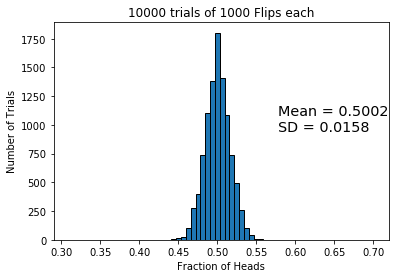

In [57]:
make_plots(100, 1000, 10000)

A **continuous uniform distribution**, or a regular distribution, has the property that all intervals of the same length have the same probability. In **discrete uniform distributions** each possible value is equally likely to occur, but the space of possible values is not continuous.

A trial in which there are exactly two possible outcomes for each repetition of the experiment (success and failure in this case) is called Bernoulli trial. The binomial distribution tells us that the probability of having exactly two successful trials out of 10 is Total # pars * prob that two trials are sucessful * probability that 8 trials fail.

$(10/2) * (1/6)^2 * (5/6)^8 = 45 * 1/36 * 390625/1679616 = 0.291$

Finger Exercise:
Use the above formula to implement a function that calculates the probability of rolling exactly two 3s in k rolls of a fair die. Use this function to plot the probability as k varies from 2 to 100.

1. n choose k
2. successful outcome
3. failing outcome

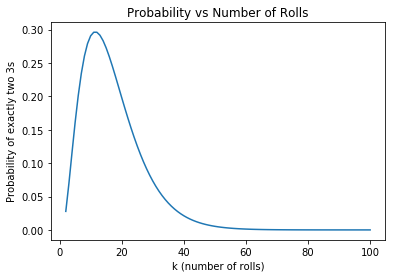

In [9]:

def n_choose_k(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

def probability_exactly_two_threes(k):
    n = 2            # number of 3s we want
    p = 1/6          # success probability
    q = 5/6          # failure probability

    return n_choose_k(k, n) * (p**n) * (q**(k-n))

ks = list(range(2, 101))
probs = [probability_exactly_two_threes(k) for k in ks]

plt.plot(ks, probs)
plt.xlabel('k (number of rolls)')
plt.ylabel('Probability of exactly two 3s')
plt.title('Probability vs Number of Rolls')
plt.show()

The **geometric distribution** is the discrete analog of the exponential distribution. It is usually thought of as describing the number of independent attempts required to achieve first success (or first failure). Imagine, for example, that you have a balky car that starts only half the time you turn the key (or push the starter button). A geometric distribution could be used to characterize the expected number of times you would have to attempt to start the car before being successful

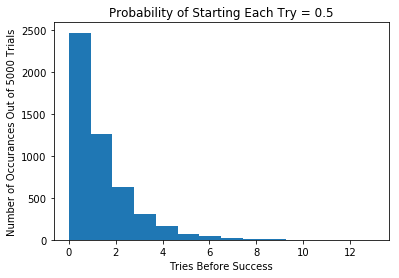

In [10]:
def successful_starts(success_prob, num_trials):
    """Assumes success_prob is a float representing probability of a single attempt being successful. num_trials is a positive int. Returns a list of the number of attempts needed before a success for each trial"""
    tries_before_success = []
    for t in range(num_trials):
        consec_failures = 0
        while random.random() > success_prob:
            consec_failures += 1
        tries_before_success.append(consec_failures)
    return tries_before_success

prob_of_success = 0.5
num_trails = 5000
distribution = successful_starts(prob_of_success, num_trails)
plt.hist(distribution, bins = 14)
plt.xlabel('Tries Before Success')
plt.ylabel('Number of Occurances Out of ' + str(num_trails) + ' Trials')
plt.title('Probability of Starting Each Try = ' + str(prob_of_success))

In [5]:
def collision_prob(n, k):
    prob = 1.0
    for i in range(1, k):
        prob = prob * ((n - i) / n)
    return 1 - prob

def sim_insertions(num_indices, num_insertions):
    """Assumes num_indices and num_insertions are positive ints. Returns 1 if there is a collision; 0 otherwise """
    choices = range(num_indices)
    used = []
    for i in range(num_insertions):
        hash_val = random.choice(choices)
        if hash_val in used:
            return 1
        else:
            used.append(hash_val)
    return 0

def find_prob(num_indices, num_insertions, num_trials):
    collisions = 0
    for t in range(num_trials):
        collisions += sim_insertions(num_indices, num_insertions)
    return collisions / num_trials


In [6]:
print('Actual probability of a collision =', collision_prob(1000, 50))
print('Est. probability of a collision =', find_prob(1000, 50, 1000))
print('Actual probability of a collision =', collision_prob(1000, 200))
print('Est. probability of a collision =', find_prob(1000, 200, 1000))

Actual probability of a collision = 0.7122686568799875
Est. probability of a collision = 0.741
Actual probability of a collision = 0.9999999994781328
Est. probability of a collision = 1.0
